In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 2: Load Data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Step 3: Handle Missing Values (if any)
# Example: Drop rows with missing values
df.dropna(inplace=True)

# Step 4: Transform Categorical Features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Step 5: Scale Numerical Features
scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Step 6: Save Transformed Data (Optional)
# df.to_csv('transformed_data.csv', index=False)

# Display the transformed DataFrame
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0.0,1,0,0.013889,0,1,0,0,...,0,0,0,0,0,1,2,0.115423,2505,0
1,3962,1,0.0,0,0,0.472222,1,0,0,2,...,2,0,0,0,1,0,3,0.385075,1466,0
2,2564,1,0.0,0,0,0.027778,1,0,0,2,...,0,0,0,0,0,1,3,0.354229,157,1
3,5535,1,0.0,0,0,0.625000,0,1,0,2,...,2,2,0,0,1,0,0,0.239303,1400,0
4,6511,0,0.0,0,0,0.027778,1,0,1,0,...,0,0,0,0,0,1,2,0.521891,925,1


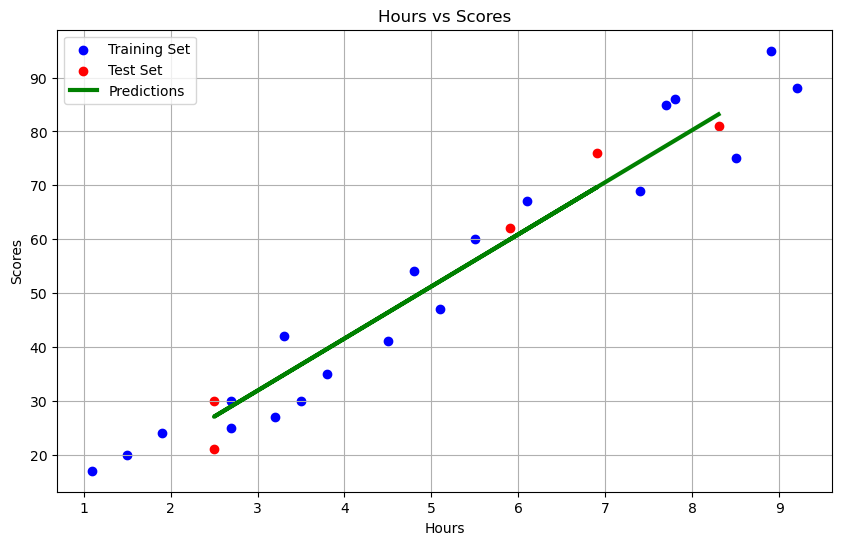

Predicted score for 8 hours: 80.28351758954531
Predicted score for 5 hours: 51.23728312617822
Predicted score for 10 hours: 99.6476738984567


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Load and Prepare Data
data1 = pd.read_csv('score.csv')
data2 = pd.read_csv('score_updated.csv')

# Split data into features (X) and target variable (y)
X = data1['Hours'].values.reshape(-1, 1)  # Reshape to 2D array for single feature
y = data1['Scores'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Visualize Results
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Set')

# Plot test data
plt.scatter(X_test, y_test, color='red', label='Test Set')

# Plot predictions
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Predictions')

plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

# Make 3 predictions
hours_to_predict = [[8], [5], [10]]
predicted_scores = model.predict(hours_to_predict)
for i, hours in enumerate(hours_to_predict):
    print(f'Predicted score for {hours[0]} hours: {predicted_scores[i]}')


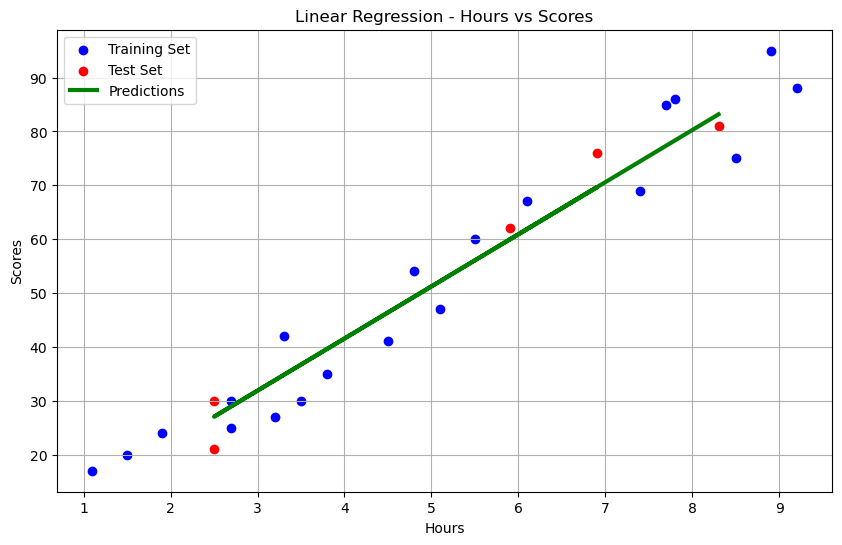

Linear Regression - Predicted score for 8 hours: 80.28351758954531
Linear Regression - Predicted score for 5 hours: 51.23728312617822
Linear Regression - Predicted score for 10 hours: 99.6476738984567


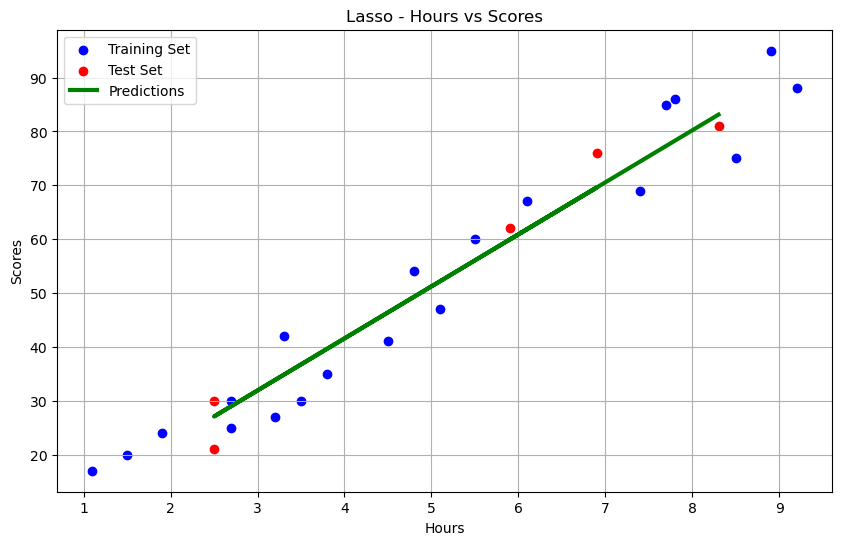

Lasso - Predicted score for 8 hours: 80.23495063424609
Lasso - Predicted score for 5 hours: 51.2366440872927
Lasso - Predicted score for 10 hours: 99.56715499888168


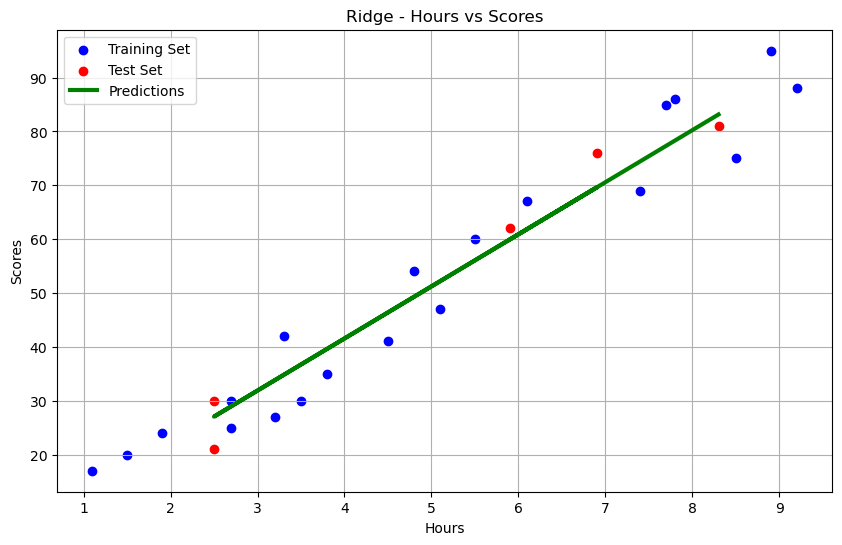

Ridge - Predicted score for 8 hours: 80.26002490262435
Ridge - Predicted score for 5 hours: 51.236974011876626
Ridge - Predicted score for 10 hours: 99.60872549645616


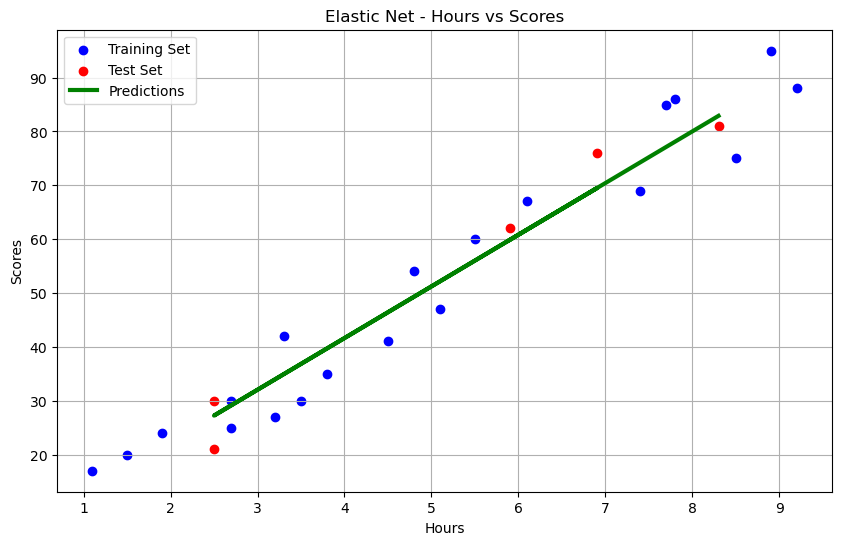

Elastic Net - Predicted score for 8 hours: 80.02617523060829
Elastic Net - Predicted score for 5 hours: 51.23389704250799
Elastic Net - Predicted score for 10 hours: 99.22102735600848


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Step 1: Load and Prepare Data
data1 = pd.read_csv('score.csv')
data2 = pd.read_csv('score_updated.csv')

# Merge data if necessary
# merged_data = pd.concat([data1, data2], ignore_index=True)

# Split data into features (X) and target variable (y)
X = data1['Hours'].values.reshape(-1, 1)  # Reshape to 2D array for single feature
y = data1['Scores'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train Models with Regularizations
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),  # L1 Regularization (Lasso)
    "Ridge": Ridge(alpha=0.1),  # L2 Regularization (Ridge)
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5)  # Elastic Net
}

for name, model in models.items():
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    y_pred = model.predict(X_test)

    # Step 4: Visualize Results
    plt.figure(figsize=(10, 6))

    # Plot training data
    plt.scatter(X_train, y_train, color='blue', label='Training Set')

    # Plot test data
    plt.scatter(X_test, y_test, color='red', label='Test Set')

    # Plot predictions
    plt.plot(X_test, y_pred, color='green', linewidth=3, label='Predictions')

    plt.title(f'{name} - Hours vs Scores')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Make 3 predictions
    hours_to_predict = [[8], [5], [10]]
    predicted_scores = model.predict(hours_to_predict)
    for i, hours in enumerate(hours_to_predict):
        print(f'{name} - Predicted score for {hours[0]} hours: {predicted_scores[i]}')
